In [1]:
from mlblocks import MLPipeline 

In [2]:
pipeline = MLPipeline('mistral_detector')
pipeline.primitives

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

['mlstars.custom.timeseries_preprocessing.time_segments_aggregate',
 'sigllm.primitives.transformation.Float2Scalar',
 'mlstars.custom.timeseries_preprocessing.rolling_window_sequences',
 'sigllm.primitives.transformation.format_as_string',
 'sigllm.primitives.forecasting.huggingface.HF',
 'sigllm.primitives.transformation.format_as_integer',
 'sigllm.primitives.transformation.Scalar2Float',
 'sigllm.primitives.postprocessing.aggregate_rolling_window',
 'orion.primitives.timeseries_errors.regression_errors',
 'orion.primitives.timeseries_anomalies.find_anomalies']

In [3]:
from orion.data import load_signal

data = load_signal('S-1')
data.shape

(10149, 2)

In [4]:
data = data.iloc[7500:7500+140+20]

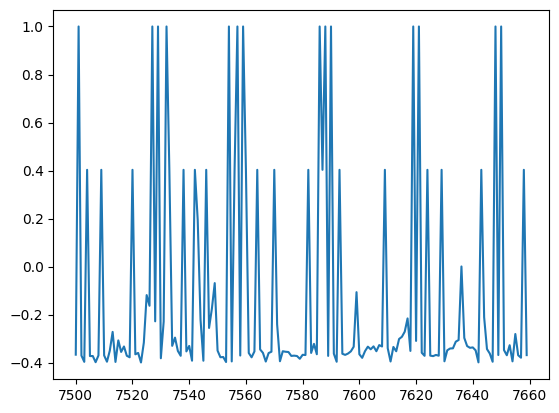

In [5]:
import matplotlib.pyplot as plt
plt.plot(data['value'])

In [6]:
step = 0
context = pipeline.fit(data, start_=step, output_=step)
context.keys()

dict_keys(['X', 'index'])

In [7]:
step = 1
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'X', 'minimum'])

In [8]:
context['minimum']

-0.3992798244929097

In [9]:
step = 2
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X', 'y', 'X_index', 'y_index'])

In [10]:
step = 3
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'X', 'y'])

In [11]:
(context['X']).flatten().tolist()[0]

'3,139,2,0,80,2,2,0,2,80,2,0,4,12,0,9,4,6,2,2,80,3,3,0,8,28,23,139,17,139,1,17,139,80,6,10,4,2,80,4,6,0,80,59,17,0,80,14,22,33,4,2,2,0,139,0,80,139,2,139,80,3,2,4,80,5,3,0,3,4,80,15,0,4,4,4,2,2,2,1,3,3,80,3,7,3,139,80,139,2,139,3,0,80,3,3,3,4,6,29,3,1,4,6,5,6,4,7,6,80,5,0,6,4,9,10,12,18,4,139,8,139,4,2,80,2,2,3,2,80,0,5,5,5,8,9,39,10,6,6'

In [12]:
step = 4
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

  0%|          | 0/20 [00:00<?, ?it/s]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.
2024-05-30 04:21:19.329197: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 04:21:19.329231: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 04:21:19.329271: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 04:21:19.335898: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other oper

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'X', 'y', 'y_hat'])

In [13]:
context['y_hat']

[['3,139,2,0,80,2,2,0,2,80,2,0,4,12,0,9,4,6,2,2,80,3,3,0,8,28,23,139,17,139,1,17,139,80,6,10,4,2,80,4,6,0,80,59,17,0,80,14,22,33,4,2,2,0,139,0,80,139,2,139,80,3,2,4,80,5,3,0,3,4,80,15,0,4,4,4,2,2,2,1,3,3,80,3,7,3,139,80,139,2,139,3,0,80,3,3,3,4,6,29,3,1,4,6,5,6,4,7,6,80,5,0,6,4,9,10,12,18,4,139,8,139,4,2,80,2,2,3,2,80,0,5,5,5,8,9,39,10,6,6,1,7,9,12,2,9'],
 ['139,2,0,80,2,2,0,2,80,2,0,4,12,0,9,4,6,2,2,80,3,3,0,8,28,23,139,17,139,1,17,139,80,6,10,4,2,80,4,6,0,80,59,17,0,80,14,22,33,4,2,2,0,139,0,80,139,2,139,80,3,2,4,80,5,3,0,3,4,80,15,0,4,4,4,2,2,2,1,3,3,80,3,7,3,139,80,139,2,139,3,0,80,3,3,3,4,6,29,3,1,4,6,5,6,4,7,6,80,5,0,6,4,9,10,12,18,4,139,8,139,4,2,80,2,2,3,2,80,0,5,5,5,8,9,39,10,6,6,6,9,6,35,3,3,6'],
 ['2,0,80,2,2,0,2,80,2,0,4,12,0,9,4,6,2,2,80,3,3,0,8,28,23,139,17,139,1,17,139,80,6,10,4,2,80,4,6,0,80,59,17,0,80,14,22,33,4,2,2,0,139,0,80,139,2,139,80,3,2,4,80,5,3,0,3,4,80,15,0,4,4,4,2,2,2,1,3,3,80,3,7,3,139,80,139,2,139,3,0,80,3,3,3,4,6,29,3,1,4,6,5,6,4,7,6,80,5,0,6,4,9,10,12,18,

In [14]:
step = 5
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'y_hat', 'X', 'y'])

In [15]:
context['y_hat'].shape

(20, 1)

In [16]:
step = 6
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'y_hat', 'X', 'y'])

In [18]:
context['y_hat']

array([[-0.36927982],
       [ 0.99072018],
       [-0.37927982],
       [-0.39927982],
       [ 0.40072018],
       [-0.37927982],
       [-0.37927982],
       [-0.39927982],
       [-0.37927982],
       [ 0.40072018],
       [-0.37927982],
       [-0.39927982],
       [-0.35927982],
       [-0.27927982],
       [-0.39927982],
       [-0.30927982],
       [-0.35927982],
       [-0.33927982],
       [-0.37927982],
       [-0.37927982]])

In [19]:
step = 7
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'y_hat', 'X', 'y'])

In [20]:
context['y_hat']

array([-0.36927982,  0.99072018, -0.37927982, -0.39927982,  0.40072018,
       -0.37927982, -0.37927982, -0.39927982, -0.37927982,  0.40072018,
       -0.37927982, -0.39927982, -0.35927982, -0.27927982, -0.39927982,
       -0.30927982, -0.35927982, -0.33927982, -0.37927982, -0.37927982])

In [21]:
step = 8
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'y_hat', 'X', 'y', 'errors'])

In [23]:
context['errors']

array([  6.36927982,   5.36927982,   0.36927982,  80.36927982,
        18.36927982,   5.36927982,   3.36927982,   0.36927982,
       139.36927982,   3.36927982, 139.36927982,   5.36927982,
         3.36927982,   7.36927982,   0.36927982,  11.36927982,
         3.36927982,   1.36927982,  80.36927982,   3.36927982])

In [24]:
step = 9
context = pipeline.fit(**context, start_=step, output_=step)
context.keys()

dict_keys(['index', 'minimum', 'X_index', 'y_index', 'y_hat', 'errors', 'X', 'y'])

In [25]:
context['y']

array([], dtype=float64)